### Question 1: Fit a Linear Regression (20)

Complete each sub-questions with either codes or written answers. Make sure to print your result if necessary. We are going to use the data from Homework 1, the diabetes data. 

In [23]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

##### 1a. Plot a scatter plot between the target value and BMI. Show the estimated linear regression line and describe what you have seen.  

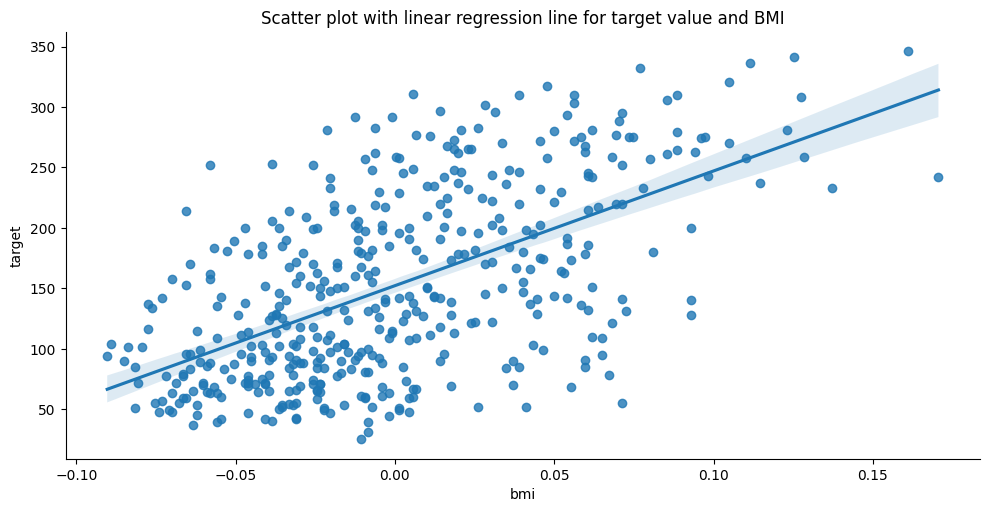

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

sns.lmplot(x = 'bmi', y = 'target', data = df, aspect = 2)

plt.title('Scatter plot with linear regression line for target value and BMI')
plt.show()

# It seems like there is a correlation between BMI and the target value, as the data points follow a 
# general linear increasing trend, although the data points do not completely follow the regression line.

##### 1b. Plot a scatter plot between the target value and one other feature in the data. Show the estimated linear regression line and describe what you have seen. 

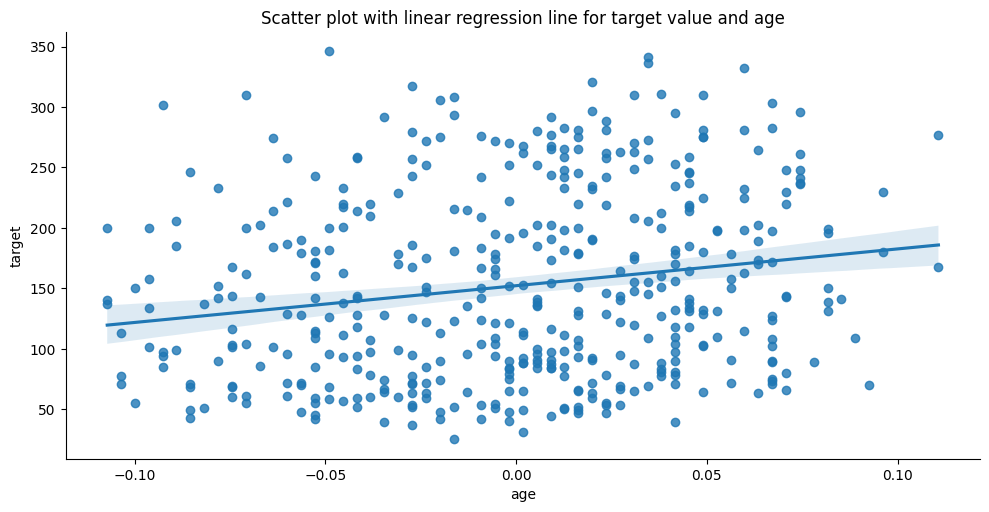

In [18]:
sns.lmplot(x = 'age', y = 'target', data = df, aspect = 2)
plt.title('Scatter plot with linear regression line for target value and age')
plt.show()

# It does not seem like there is a correlation between age and the target value, as the data 
# points are completely scattered and do not really follow the regression line.

##### 1c. Fit a linear model between the target value and BMI. Print the intercept and slope. Describe how BMI affects the target value. 

In [45]:
import sklearn
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(df[['bmi']], df['target'])

print("The estimated intercept is %.3f" %lm.intercept_)
print("The estimated coefficient is %.3f" %lm.coef_)

# Based on the large coefficient, there seems to be a very large positive slope, indicating there 
# is a strong positive relationship between BMI and the target value.

The estimated intercept is 152.133
The estimated coefficient is 949.435


##### 1d. Fir a linear model between the target value and all features. Print the coefficients for all features. 

In [43]:
import sklearn
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X = df.drop(['target'], axis = 1)

lm.fit(df, df['target'])

import pandas as pd
from pandas import DataFrame

coef_df = DataFrame(X.columns)
coef_df.columns = ['Feature']
coef_df["Coefficient Estimate"] = pd.Series(lm.coef_)
print(coef_df)

  Feature  Coefficient Estimate
0     age         -3.284365e-13
1     sex          3.245182e-13
2     bmi          3.332404e-13
3      bp          1.180507e-13
4      s1         -5.568149e-13
5      s2          3.795514e-13
6      s3          1.560352e-13
7      s4          1.002938e-13
8      s5          3.990990e-13
9      s6          2.879112e-14


##### 1e. Do you think linear model is a good model to use in this case? (Think about whether linear regression assumptions are satisfied. )

Not necessarily, although the first plot I made had a somewhat linear relationship, the second one did not, the points seemed to be scattered everywhere. So a linear model is appropriate for some of the variables such as BMI vs. target, but not all variables.

### Question 2: Gradient Descent in Linear Regression (30)

Write Python code to implement the gradient descent method in linear regression. You can use the functions as a start (or you can start from scratch). Verify your code with sample data and LinearRegression in sklearn. 

In [55]:
import numpy as np

# Generate a sample data with target y and feature X, feel free to change
x = np.random.normal(loc=5, scale=3, size=100)
y = 2 * x + np.random.normal(loc=0, scale=1, size=100)
X = np.column_stack((np.ones(100), x))

In [101]:
# Implement the gradient descent functions. Import any module if you need. 
import numpy as np

def compute_cost(predictions, y):

    n = len(y)
    # Compute the squared errors
    error = y - predictions

    squared_error = np.square(error)

    # Calculate the mean squared error (MSE)
    MSE = np.mean(squared_error)
    
    return MSE
    
def gradient_descent(X_b, y, theta, learning_rate, num_iterations):

    cost_history = []

    n = len(y)
    
    for i in range(num_iterations):
        prediction = np.dot(X_b, theta)
        error = y - prediction
        gradient = -(2/n) * np.dot(X_b.T, error)
        theta = theta - learning_rate * gradient

        cost = compute_cost(prediction, y)

        cost_history.append(cost)
        
    return theta, cost_history

learning_rate = 0.01
number_interactions = 1000
theta = np.zeros(X.shape[1])

t, c = gradient_descent(X, y, theta, learning_rate, number_interactions)

print('theta', t)
print('cost_history', c)

# verification with sklearn
import sklearn
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X, y)

coef_df["Coefficient Estimate"] = pd.Series(lm.coef_)

print('verification', coef_df)

theta [0.0180889  1.99758148]
cost_history [123.00492750654055, 18.131917831731847, 3.3401345610824857, 1.253627643450937, 0.9591063791418872, 0.9173338858916148, 0.9112124472812887, 0.9101220449150237, 0.9097439251943323, 0.9094689287434881, 0.9092111066844087, 0.9089583053843688, 0.9087087798401595, 0.9084622534724712, 0.9082186571733964, 0.9079779514543524, 0.907740101357164, 0.9075050729112738, 0.9072728326299265, 0.907043347435018, 0.9068165846424603, 0.9065925119561271, 0.9063710974630547, 0.9061523096288704, 0.9059361172932974, 0.9057224896657157, 0.9055113963207774, 0.9053028071940719, 0.9050966925778475, 0.9048930231167757, 0.9046917698037743, 0.9044929039758739, 0.9042963973101366, 0.9041022218196219, 0.9039103498494002, 0.9037207540726153, 0.903533407486592, 0.9033482834089896, 0.9031653554740021, 0.9029845976286037, 0.9028059841288381, 0.9026294895361514, 0.9024550887137691, 0.9022827568231169, 0.9021124693202823, 0.9019442019525189, 0.9017779307547948, 0.9016136320463738, 

In [95]:
# Run your code with the sample X and y. Then compare with the result with LinearRegression in sklearn. 

### Question 3 MLE for Poisson Regression (30)

In the lecture we have showed you how to achieve the MLE for the linear regression. Now let's try to replicate it with another regression: Poisson regression. We will discuss it more later so don't worry if you have never heard about it. 

Poisson regression only has one parameter $\lambda$, which is also the mean of the distribution (like the $\mu$ in the linear regression). The pdf is 
$$f(y_i|X_i, \lambda) = \frac{\lambda^{X_i} e^{-\lambda}}{X_i!}$$
while $X_i!$ is the factorial of $X_i$. 

Now try to esimate the MLE for the $\lambda$ in Poisson regression. Latex is preferred but written and submitted by picture is also accpetable. (Hint: review the lecture note and follow the steps: write the likelihood, calculate the log-likelihood, take the derivative and solve the equation when the derivative is equal to 0. The answer is a simple one and there is no factorial included.)

$$ L(\lambda) = \prod_{i = 1}^{n} \frac{\lambda^{X_i} e^{-\lambda}}{X_i!} $$

$$ log(L(\lambda))= \sum_{i = 1}^{n} log(\frac{\lambda^{X_i} e^{-\lambda}}{X_i!}) $$

$$  log(L(\lambda))= \sum_{i = 1}^{n} (log(\lambda^{X_{i}}) + log(e^{-\lambda})) - log(X_i!) $$

$$  = \sum_{i = 1}^{n} X_{i}log(\lambda) - \lambda $$ (drop log(X_i!) as there is no lambda it is not needed for final solution)

$$ \frac{d}{d\lambda} = \sum_{i = 1}^{n} \frac{X_{i}}{\lambda} - 1 $$

$$ \sum_{i = 1}^{n} (\frac{X_{i}}{\lambda} - 1) = 0 $$

$$ \sum_{i = 1}^{n} \frac{X_{i}}{\lambda} - \sum_{i = 1}^{n} 1 = 0 $$

$$ \sum_{i = 1}^{n} \frac{X_{i}}{\lambda} = n $$

$$ \frac{\sum_{i = 1}^{n} X_{i}}{\sum_{i = 1}^{n} \lambda} = n $$

$$ \frac{\sum_{i = 1}^{n} X_{i}}{n * \lambda} = n $$

$$ \sum_{i = 1}^{n} X_{i} = n * n * \lambda $$

$$ \frac{\sum_{i = 1}^{n} X_{i}}{n^{2}} = \lambda $$



### Question 4 Another MLE practice (20)

Let's make a random pdf, when $0 \leq X_i \leq \theta$, we have:

$$f(y_i|X_i, \theta ) = 2 * \frac{(\theta - X_i)}{\theta^2} $$

For all the other value, let $f(y_i|X_i, \theta) = 0$. 

1. First, prove it is a valid pdf. Hint: a valid pdf means all the values are positive and the interval of pdf should be equal to 1. 
2. Calculate the MLE estimator. Stop after taking the deriative since the equation doesn't have a simple closed-form solution

1. The values are always positive because X is between 0 and theta, so the numerator will never be below 0. The integral from 0 to theta also equals 0, as show below:
   $$ \int_{0}^{\theta} 2 * \frac{\theta - X_{i}}{\theta^{2}} $$
   $$ = 2 * \int_{0}^{\theta} \frac{\theta} {\theta^{2}} - \frac{X_{i}}{\theta^{2}} $$
   $$ = 2 * \int_{0}^{\theta} \frac{\theta} {\theta^{2}} - \int_{0}^{\theta} \frac{X_{i}}{\theta^{2}} $$
   $$ = 2 * \int_{0}^{\theta} \frac{1} {\theta}dx - \int_{0}^{\theta} \frac{X_{i}}{\theta^{2}}dx $$
   $$ = 2 * (\mid_{0}^{\theta} \frac{X_{i}} {\theta} - \mid_{0}^{\theta} \frac{X_{i}^{2}}{2 * \theta^{2}}) $$
   $$ = 2 * ((\frac{\theta} {\theta} - \frac{0} {\theta}) - (\frac{\theta^{2}}{2 * \theta^{2}} - \frac{0}{2 * \theta^{2}})) $$
   $$ = 2 * (1 - \frac{1}{2}) $$
   $$ = 1 $$

2. $$ L(\theta) = \prod_{i = 1}^{n} 2 * \frac{\theta - X_{i}}{\theta^{2}} $$

$$ log(L(\theta)) = \sum_{i = 1}^{n} log(2 * \frac{\theta - X_{i}}{\theta^{2}}) $$

$$ log(L(\theta)) = \sum_{i = 1}^{n} log(2) + (log(\theta - X_{i}) - log(\theta^{2})) $$

$$ \frac{d}{d\theta}log(L(\theta)) = \sum_{i = 1}^{n} \frac{1}{\theta - X_{i}} - \frac{2}{\theta} $$